In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Linear Methods for Classification

###  Introduction

In this chapter we revisit the classification problem and focus on linear methods for classification. Since our predictor $ G(x) $ takes values in a discrete set $ G $, we can always divide the input space into a collection of regions labeled according to the classification. 

We saw in Chapter 2 that the boundaries of these regions can be rough or smooth, depending on the prediction function. For an important class of procedures, these decision boundaries are linear; this is what we will mean by linear methods for classification. 

There are several different ways in which linear decision boundaries can be found. In Chapter 2 we fit linear regression models to the class indicator variables, and classify to the largest fit. Suppose there are $ K $ classes, for convenience labeled $ 1, 2, \ldots, K $, and the fitted linear model for the $ k $th indicator response variable is 

$$
\hat{f}_k(x) = \hat{\beta}_{k0} + \hat{\beta}_k^T x.
$$

The decision boundary between class $ k $ and $ \ell $ is that set of points for which 

$$
\hat{f}_k(x) = \hat{f}_\ell(x),
$$

that is, the set 

$$
\{x : (\hat{\beta}_{k0} - \hat{\beta}_{\ell0}) + (\hat{\beta}_k - \hat{\beta}_\ell)^T x = 0\},
$$ 

an affine set or hyperplane. 

Strictly speaking, a hyperplane passes through the origin, while an affine set need not. We sometimes ignore the distinction and refer in general to hyperplanes. 

This regression approach is a member of a class of methods that model discriminant functions $ \delta_k(x) $ for each class, and then classify $ x $ to the class with the largest value for its discriminant function. Methods that model the posterior probabilities $ \Pr(G = k | X = x) $ are also in this class. 

Clearly, if either the $ \delta_k(x) $ or $ \Pr(G = k | X = x) $ are linear in $ x $, then the decision boundaries will be linear. Actually, all we require is that some monotone transformation of $ \delta_k $ or $ \Pr(G = k | X = x) $ be linear for the decision boundaries to be linear. 

For example, if there are two classes, a popular model for the posterior probabilities is 

$$
\Pr(G = 1|X = x) = \frac{\exp(\beta_0 + \beta^T x)}{1 + \exp(\beta_0 + \beta^T x)}
$$ 

and 

$$
\Pr(G = 2|X = x) = \frac{1}{1 + \exp(\beta_0 + \beta^T x)}.
$$

Here the monotone transformation is the logit transformation: 

$$
\log\left(\frac{p}{1 - p}\right),
$$ 

and in fact we see that 

$$
\Pr(G = 1|X = x) \log = \beta_0 + \beta^T x.
$$ 

The decision boundary is the set of points for which the log-odds are zero, and this is a hyperplane defined by 

$$
x | \beta_0 + \beta^T x = 0.
$$ 

We discuss two very popular but different methods that result in linear log-odds or logits: linear discriminant analysis and linear logistic regression. Although they differ in their derivation, the essential difference between them is in the way the linear function is fit to the training data. 

A more direct approach is to explicitly model the boundaries between the classes as linear. For a two-class problem in a $ p $-dimensional input space, this amounts to modeling the decision boundary as a hyperplane—in other words, a normal vector and a cut-point. 

We will look at two methods that explicitly look for “separating hyperplanes.” The first is the well-known perceptron model of Rosenblatt (1958), with an algorithm that finds a separating hyperplane in the training data, if one exists. The second method, due to Vapnik (1996), finds an optimally separating hyperplane if one exists, else finds a hyperplane that minimizes some measure of overlap in the training data. 

We treat the separable case here and defer treatment of the nonseparable case to Chapter 12. 

While this entire chapter is devoted to linear decision boundaries, there is considerable scope for generalization. For example, we can expand our variable set $ X_1, \ldots, X_p $ by including their squares and cross-products $ X_1^2, X_2^2, \ldots, X_1 X_2, \ldots $, thereby adding $ \frac{p(p + 1)}{2} $ additional variables. 

Linear functions in the augmented space map down to quadratic functions in the original space—hence linear decision boundaries to quadratic decision boundaries. 

The data are the same: the left plot uses linear decision boundaries in the two-dimensional space shown, while the right plot uses linear decision boundaries in the augmented five-dimensional space described above. This approach can be used with any basis transformation.


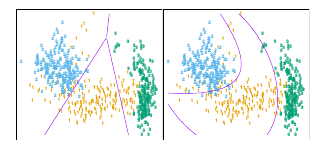

Fig. 1. The left plot shows some data from three classes, with linear decision boundaries found by linear discriminant analysis. The right plot shows quadratic decision boundaries. These were obtained by ﬁnding linear boundaries in the ﬁve-dimensional space $X_1$ ,$ X_2$ , $X_1$$X_2$ , $X_1^2$ , $X2^2$ . Linear inequalities in this space are quadratic inequalities in the original space.

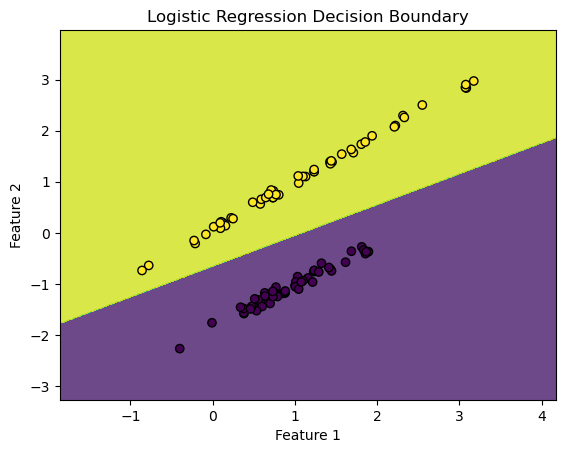

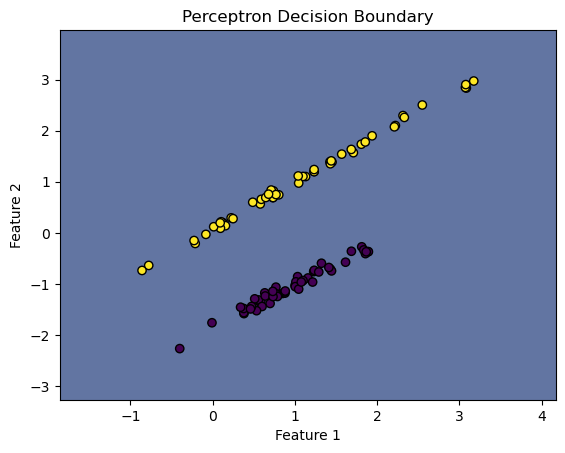

Logistic Regression Accuracy: 1.00
Perceptron Accuracy: 0.50


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic data
def generate_data(n_samples=100, n_features=2, n_classes=2, random_state=42):
    """Generates synthetic binary classification data."""
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, n_informative=2,
                               n_redundant=0, n_clusters_per_class=1, random_state=random_state)
    return X, y

# Step 2: Logistic Regression
def logistic_regression(X, y):
    """Fits a logistic regression model."""
    model = LogisticRegression()
    model.fit(X, y)
    return model

# Step 3: Perceptron Algorithm
class Perceptron:
    """A simple implementation of the perceptron algorithm."""
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """Fits the perceptron model to the training data."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert y from {0, 1} to {-1, 1}
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, -1)

                # Update weights and bias
                if y_[idx] - y_predicted > 0:
                    self.weights += self.learning_rate * x_i * y_[idx]
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        """Makes predictions using the fitted model."""
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Step 4: Plotting decision boundaries
def plot_decision_boundary(model, X, y, title):
    """Plots the decision boundary created by the model."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict using the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Step 5: Running the models
if __name__ == "__main__":
    # Generate synthetic data
    X, y = generate_data(n_samples=100, n_features=2, n_classes=2)

    # Fit Logistic Regression
    log_model = logistic_regression(X, y)
    plot_decision_boundary(log_model, X, y, title="Logistic Regression Decision Boundary")

    # Fit Perceptron
    perc_model = Perceptron(learning_rate=0.01, n_iterations=1000)
    perc_model.fit(X, y)
    plot_decision_boundary(perc_model, X, y, title="Perceptron Decision Boundary")

    # Evaluate models
    y_pred_log = log_model.predict(X)
    y_pred_perc = perc_model.predict(X)

    print(f"Logistic Regression Accuracy: {accuracy_score(y, y_pred_log):.2f}")
    print(f"Perceptron Accuracy: {accuracy_score(y, y_pred_perc):.2f}")


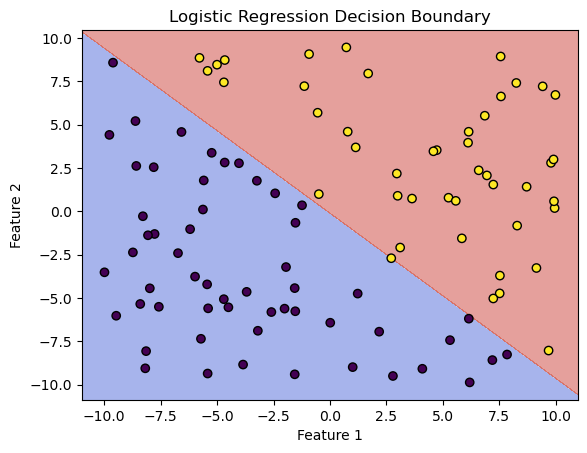

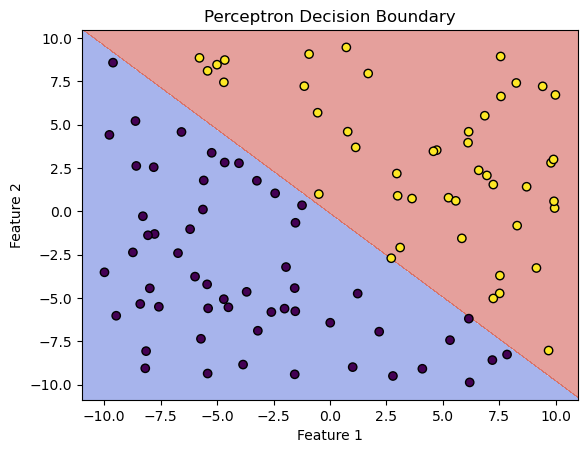

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np  # Make sure to import numpy

# Step 1: Generate synthetic data
def generate_data(n_samples=100, n_features=2, n_classes=2, random_state=42):
    """Generates synthetic binary classification data."""
    random.seed(random_state)
    X = []
    y = []
    for _ in range(n_samples):
        # Generate random features
        x = [random.uniform(-10, 10) for _ in range(n_features)]
        # Simple linear decision boundary for two classes
        if x[0] + x[1] > 0:
            X.append(x)
            y.append(1)  # Class 1
        else:
            X.append(x)
            y.append(0)  # Class 0
    return X, y

# Step 2: Logistic Regression
class LogisticRegression:
    """Simple implementation of logistic regression."""
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """Fits the logistic regression model to the training data."""
        n_samples, n_features = len(X), len(X[0])
        self.weights = [0.0] * n_features
        self.bias = 0.0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = self._linear_prediction(x_i)
                y_predicted = self._sigmoid(linear_output)

                # Update weights and bias
                for j in range(n_features):
                    self.weights[j] += self.learning_rate * (y[idx] - y_predicted) * x_i[j]
                self.bias += self.learning_rate * (y[idx] - y_predicted)

    def _linear_prediction(self, x):
        """Computes the linear prediction."""
        return sum(w * x_i for w, x_i in zip(self.weights, x)) + self.bias

    def _sigmoid(self, z):
        """Applies the sigmoid function."""
        return 1 / (1 + (2.71828 ** -z))

    def predict(self, X):
        """Makes predictions using the fitted model."""
        linear_output = [self._linear_prediction(x_i) for x_i in X]
        return [1 if self._sigmoid(z) >= 0.5 else 0 for z in linear_output]

# Step 3: Perceptron Algorithm
class Perceptron:
    """A simple implementation of the perceptron algorithm."""
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """Fits the perceptron model to the training data."""
        n_samples, n_features = len(X), len(X[0])
        self.weights = [0.0] * n_features
        self.bias = 0.0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = self._linear_prediction(x_i)
                y_predicted = 1 if linear_output >= 0 else 0

                # Update weights and bias
                if y[idx] != y_predicted:
                    for j in range(n_features):
                        self.weights[j] += self.learning_rate * (y[idx] - y_predicted) * x_i[j]
                    self.bias += self.learning_rate * (y[idx] - y_predicted)

    def _linear_prediction(self, x):
        """Computes the linear prediction."""
        return sum(w * x_i for w, x_i in zip(self.weights, x)) + self.bias

    def predict(self, X):
        """Makes predictions using the fitted model."""
        return [1 if self._linear_prediction(x_i) >= 0 else 0 for x_i in X]

# Step 4: Plotting decision boundaries
def plot_decision_boundary(model, X, y, title):
    """Plots the decision boundary created by the model."""
    x_min, x_max = min(x[0] for x in X) - 1, max(x[0] for x in X) + 1
    y_min, y_max = min(x[1] for x in X) - 1, max(x[1] for x in X) + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Create a grid of points with shape (n_points, 2)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Get predictions for each point in the grid
    Z = model.predict(grid_points)

    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(*zip(*X), c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Step 5: Running the models
if __name__ == "__main__":
    # Generate synthetic data
    X, y = generate_data(n_samples=100, n_features=2, n_classes=2)

    # Fit Logistic Regression
    log_model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
    log_model.fit(X, y)
    plot_decision_boundary(log_model, X, y, title="Logistic Regression Decision Boundary")

    # Fit Perceptron
    perc_model = Perceptron(learning_rate=0.01, n_iterations=1000)
    perc_model.fit(X, y)
    plot_decision_boundary(perc_model, X, y, title="Perceptron Decision Boundary")


## Linear Regression of an Indicator Matrix

Consider a classification problem with $K$ classes. Each of the response categories is coded via an indicator variable. For a response $G$ with $K$ classes, we define $Y_k = 1$ if $G = k$ and $Y_k = 0$ otherwise, where $k = 1, \dots, K$. 

Thus, for an observation $i$, the response vector $Y_i$ is:

$$
Y_i = (Y_{i1}, Y_{i2}, \dots, Y_{iK})
$$

We collect these responses for all $N$ observations into an $N \times K$ indicator matrix $Y$, where each row corresponds to a single class indicator.

## Fitting the Linear Regression Model

The goal is to fit a linear regression model to each column of $Y$ simultaneously. The fitted values are given by:

$$
\hat{Y} = X (X^T X)^{-1} X^T Y
$$

Here, $X$ is the model matrix with $p + 1$ columns, where the first column consists of 1’s for the intercept and the remaining columns correspond to the $p$ input features.

The estimated coefficient matrix $\hat{B}$ is:

$$
\hat{B} = (X^T X)^{-1} X^T Y
$$

This gives a coefficient vector for each response column $y_k$, resulting in a $(p + 1) \times K$ coefficient matrix.

## Classifying New Observations

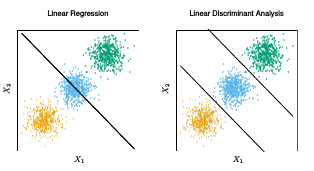
Fig. 2. The data come from three classes in IR and are easily separated by linear decision boundaries. The right plot shows the boundaries found by linear discriminant analysis. The left plot shows the boundaries found by linear regres- sion of the indicator response variables. The middle class is completely masked (never dominates).

For a new input $x$, the fitted output is:

$$
\hat{f}(x)^T = (1, x^T)\hat{B}
$$

This gives a $K$-dimensional vector. The class prediction for $x$ is the index $k$ of the largest component in this vector:

$$
\hat{G}(x) = \arg \max_{k \in G} \hat{f}_k(x)
$$

## Justification

The regression approach estimates the conditional expectation of $Y_k$ given $X = x$, which corresponds to the posterior probability:

$$
E(Y_k | X = x) = P(G = k | X = x)
$$

However, the linear regression model can be too rigid. The fitted values $\hat{f}_k(x)$ can sometimes be negative or greater than 1, but as long as there is an intercept in the model, it can be shown that:

$$
\sum_{k \in G} \hat{f}_k(x) = 1
$$

This approach is often used despite these issues because it tends to give reasonable results for many problems.

## Classification with Squared Euclidean Distance

An alternative viewpoint is to construct target vectors $t_k$ for each class, where $t_k$ is the $k$-th column of the $K \times K$ identity matrix. For each observation, we try to minimize the squared Euclidean distance between the fitted vector and the target vector:

$$
\min_B \sum_{i=1}^{N} ||y_i - (1, x_i^T)B||^2
$$

For a new observation, classification is done by finding the closest target vector:

$$
\hat{G}(x) = \arg \min_k ||\hat{f}(x) - t_k||^2
$$

## Limitations of Linear Regression for Multiple Classes

A notable issue with linear regression for classification is when $K \geq 3$, particularly for large $K$. Classes can be masked by others, leading to poor classification performance. This is due to the rigid nature of linear regression. For example, if classes are linearly separable, linear regression might still fail to capture the correct boundaries, as illustrated in the figures.

Polynomial terms may be required to resolve such situations, with the degree of the polynomial needed increasing with $K$.

In summary, while linear regression can work well for classification with a small number of classes, it faces challenges when $K$ is large or when the classes are not linearly separable. More flexible models, such as logistic regression or non-linear basis expansions, are often better suited for such problems.




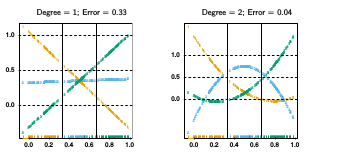

Fig. 3. The eﬀects of masking on linear regression in IR for a three-class problem. The rug plot at the base indicates the positions and class membership of each observation. The three curves in each panel are the ﬁtted regressions to the three-class indicator variables; for example, for the blue class, yblue is 1 for the blue observations, and 0 for the green and orange. The ﬁts are linear and quadratic polynomials. Above each plot is the training error rate. The Bayes error rate is 0.025 for this problem, as is the LDA error rate.

## High-Dimensional Classification Challenges

In a $ p $-dimensional input space with $ K $ classes, the complexity of modeling can increase significantly. To represent interactions between features, we may need polynomial terms up to degree $ K-1 $. This leads to $ O(p^{K-1}) $ terms, which can become infeasible as $ K $ increases.

## Masking Phenomenon

The term "masking" refers to situations where the signal of interest is obscured, making it difficult for a model to distinguish between classes effectively. This phenomenon is particularly prevalent when:

- $ K $ is large
- $ p $ is small

For example, in a vowel recognition problem, with $ K = 11 $ classes in $ p = 10 $ dimensions, the challenges become evident.

### Error Rates of Different Models

In comparing error rates among various models, we observe:

- **Linear Regression**: $ 67\% $ error rate.
- **Linear Discriminant Analysis (LDA)**: $ 56\% $ error rate.

These results indicate the struggle of simpler linear models with high-dimensional classification.

### Avoiding Masking

Models that effectively handle the complexities of high-dimensional data employ strategies to mitigate masking, such as:

1. **Regularization**: To reduce the impact of irrelevant features.
2. **Feature Selection**: To retain only the most informative features.
3. **Transformations**: Using kernel methods to capture non-linear relationships.

## Conclusion

The challenges of high-dimensional classification underscore the importance of selecting appropriate modeling techniques and performing diligent feature engineering.



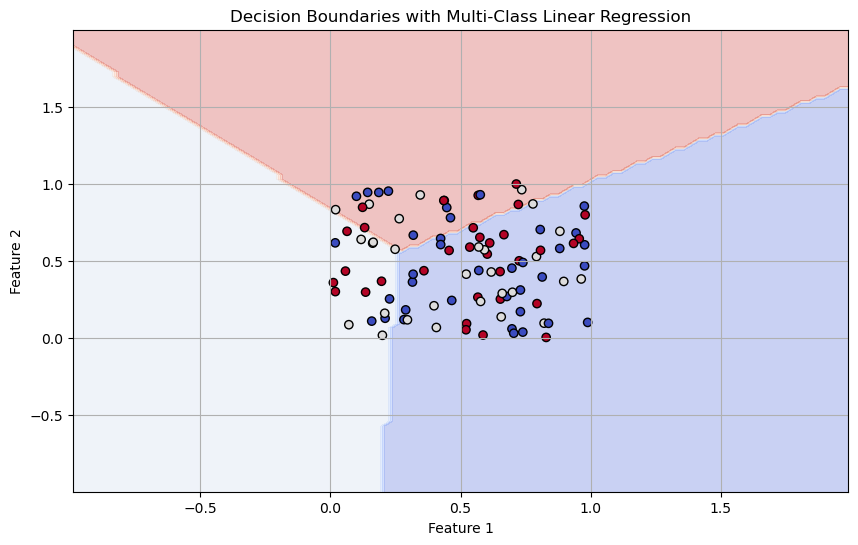

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class MultiClassLinearRegression:
    def __init__(self):
        self.B_hat = None

    def fit(self, X, Y):
        """
        Fit the linear regression model to the indicator matrix Y.
        
        Parameters:
        X : np.ndarray
            The input feature matrix (N x (p+1)), where N is the number of samples 
            and p is the number of features. X should include a column of 1's for the intercept.
        Y : np.ndarray
            The response indicator matrix (N x K), where K is the number of classes.
        """
        # Calculate B̂ = (X^T X)^{-1} X^T Y
        self.B_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

    def predict(self, X):
        """
        Make predictions for the input feature matrix X.
        
        Parameters:
        X : np.ndarray
            The input feature matrix (N x p), where N is the number of samples 
            and p is the number of features. X should not include a column of 1's for the intercept.

        Returns:
        np.ndarray
            The predicted class labels for each input sample.
        """
        # Add a column of 1's for the intercept
        X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))

        # Compute the fitted output: f̂(x) = (1, x^T) B̂
        f_hat = X_with_intercept @ self.B_hat

        # Return the class with the highest predicted value
        return np.argmax(f_hat, axis=1)

    def plot_decision_boundaries(self, X, Y):
        """
        Plots decision boundaries for each class based on the trained model.
        
        Parameters:
        X : np.ndarray
            The input feature matrix (N x p).
        Y : np.ndarray
            The response indicator matrix (N x K).
        """
        # Create a grid of points
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

        # Predict on the grid points
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_predictions = self.predict(grid_points)

        # Plotting decision boundaries
        plt.figure(figsize=(10, 6))
        plt.contourf(xx, yy, grid_predictions.reshape(xx.shape), alpha=0.3, cmap='coolwarm')

        # Plotting the training points
        plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1), edgecolors='k', marker='o', cmap='coolwarm')
        plt.title("Decision Boundaries with Multi-Class Linear Regression")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.grid()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    N = 100  # number of samples
    p = 2    # number of features
    K = 3    # number of classes

    # Features: N x p
    X = np.random.rand(N, p)

    # Create an indicator matrix Y for K classes
    Y = np.zeros((N, K))
    for i in range(N):
        Y[i, np.random.randint(0, K)] = 1  # Randomly assign one of the K classes

    # Fit the model
    model = MultiClassLinearRegression()
    
    # Add a column of 1's for the intercept
    X_with_intercept = np.hstack((np.ones((N, 1)), X))
    model.fit(X_with_intercept, Y)

    # Make predictions
    predictions = model.predict(X)

    # Plot decision boundaries
    model.plot_decision_boundaries(X, Y)


## Linear Discriminant Analysis (LDA)

### Overview
In decision theory for classification, we need to know the class posteriors $ \Pr(G|X) $ for optimal classification. Let $ f_k(x) $ be the class-conditional density of \( X \) in class $ G = k $, and let $ \pi_k $ be the prior probability of class $ k $ such that $ \sum_{k=1}^{K} \pi_k = 1 $. By applying Bayes' theorem, we have:

$$
\Pr(G = k|X = x) = \frac{f_k(x) \pi_k}{\sum_{\ell=1}^{K} f_\ell(x) \pi_\ell}
$$

### Class Density Estimation
Many classification techniques are based on models for class densities:

- **Linear Discriminant Analysis (LDA)** and **Quadratic Discriminant Analysis (QDA)** use Gaussian densities.
- More flexible mixtures of Gaussians allow for nonlinear decision boundaries.
- Nonparametric density estimates provide maximum flexibility.
- **Naive Bayes models** assume that each class density is a product of marginal densities, indicating conditional independence among inputs.

### Gaussian Class Density
Suppose each class density is modeled as a multivariate Gaussian:

$$
f_k(x) = \frac{1}{(2\pi)^{p/2} |\Sigma_k|^{1/2}} e^{-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)}
$$

LDA assumes a common covariance matrix across classes, $ \Sigma_k = \Sigma \forall k $.

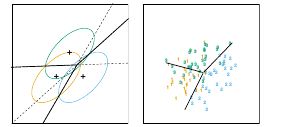

Fig. 5. The left panel shows three Gaussian distributions, with the same covariance and diﬀerent means. Included are the contours of constant density enclosing 95% of the probability in each case. The Bayes decision boundaries between each pair of classes are shown (broken straight lines), and the Bayes decision boundaries separating all three classes are the thicker solid lines (a subset of the former). On the right we see a sample of 30 drawn from each Gaussian distribution, and the ﬁtted LDA decision boundaries.

## Decision Boundaries in Linear Discriminant Analysis

In LDA, we analyze the contours corresponding to 95% highest probability density, as well as the class centroids. It is important to note that the decision boundaries are not necessarily the perpendicular bisectors of the line segments joining the centroids. This would only occur if the covariance \( \Sigma \) were spherical \( \sigma^2 I \), and the class priors were equal.

### Linear Discriminant Functions
From the earlier equations, we derive the linear discriminant functions:

$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \pi_k
$$

This function provides an equivalent description of the decision rule, where the predicted class is given by:

$$
G(x) = \arg\max_{k} \delta_k(x)
$$

### Parameter Estimation
In practice, the parameters of the Gaussian distributions are not known and must be estimated from the training data. The estimations are given by:

- The prior probability for class $ k $:

$$
\hat{\pi}_k = \frac{N_k}{N}
$$

where $ N_k $ is the number of observations in class $ k $.

- The class mean for class $ k $:

$$
\hat{\mu}_k = \frac{\sum_{g_i = k} x_i}{N_k}
$$

- The common covariance matrix:

$$
\hat{\Sigma} = \frac{\sum_{k=1}^{K} \sum_{g_i = k} (x_i - \hat{\mu}_k)(x_i - \hat{\mu}_k)^T}{N - K}
$$



### Decision Boundaries
To classify between two classes $ k $ and $ \ell $:

$$
\log \left( \frac{\Pr(G = k|X = x)}{\Pr(G = \ell|X = x)} \right) = \log \left( \frac{f_k(x) \pi_k}{f_\ell(x) \pi_\ell} \right)
$$

This simplifies to:

$$
\log \left( \frac{\pi_k}{\pi_\ell} \right) - \frac{1}{2} (\mu_k + \mu_\ell)^T \Sigma^{-1} (\mu_k - \mu_\ell) + x^T \Sigma^{-1} (\mu_k - \mu_\ell)
$$

This indicates that the decision boundary between classes $ k $ and $ \ell $ is linear in $ x $.

### Linear Discriminant Function
The linear discriminant function can be defined as:

$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \pi_k
$$

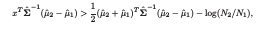



### Parameter Estimation
The parameters of the Gaussian distributions are estimated from the training data:

- Prior probability: $ \hat{\pi}_k = \frac{N_k}{N} $
- Class means: $ \hat{\mu}_k = \frac{\sum_{g_i = k} x_i}{N_k} $
- Common covariance: 

$$
\hat{\Sigma} = \frac{\sum_{k=1}^{K} \sum_{g_i = k} (x_i - \hat{\mu}_k)(x_i - \hat{\mu}_k)^T}{N - K}
$$

## Quadratic Discriminant Analysis

Returning to the general discriminant problem, if we do not assume that the covariance matrices \( \Sigma_k \) are equal, we retain the quadratic terms in the decision functions. Specifically, we derive the quadratic discriminant functions (QDA):

$$
\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log \pi_k
$$

### Decision Boundary
The decision boundary between each pair of classes $ k $ and $ \ell $ is described by the quadratic equation:

$$
\{x : \delta_k(x) = \delta_\ell(x)\}
$$

### Example Illustration
Figure 6 illustrates this concept using three classes that are Gaussian mixtures. The decision boundaries in this case are approximated by quadratic equations in $ x $. 

- The right plot employs QDA as described above.
- The left plot uses LDA in an enlarged five-dimensional quadratic polynomial space.

The differences between these methods are generally small, but QDA is often preferred due to its flexibility, while LDA can serve as a convenient substitute.


### Error Rates
Table 4.1 shows the training and test error rates using various linear techniques on the vowel data:

| Technique                     | Training Error | Test Error |
|-------------------------------|----------------|------------|
| Linear Regression             | 0.48           | 0.67       |
| Linear Discriminant Analysis   | 0.32           | 0.56       |
| Quadratic Discriminant Analysis | 0.01           | 0.53       |
| Logistic Regression           | 0.22           | 0.51       |


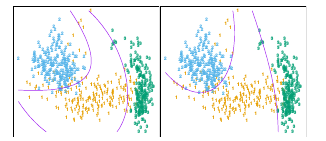
Fig. 6. Two methods for ﬁtting quadratic boundaries. The left plot shows the quadratic decision boundaries for the data in Figure 4.1 (obtained using LDA in the ﬁve-dimensional space X1 , X2 , X1 X2 , X12 , X22 ). The right plot shows the quadratic decision boundaries found by QDA. The diﬀerences are small, as is usually the case.

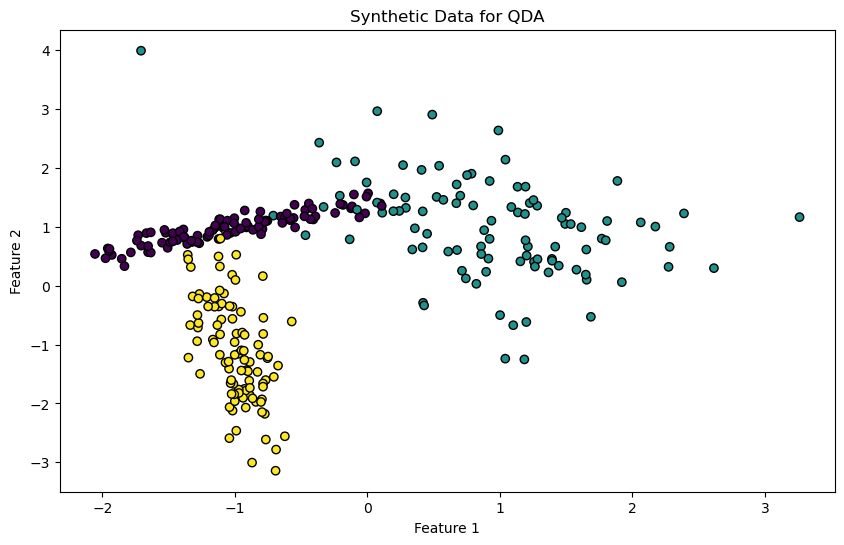

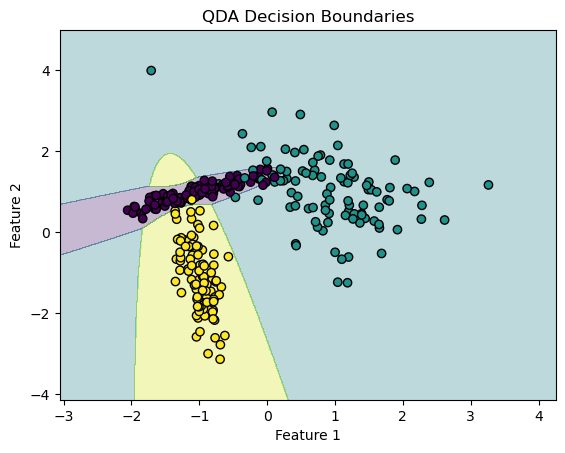

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Generate synthetic data
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, 
                           n_classes=3, random_state=42)

# Visualize the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Synthetic Data for QDA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Fit the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

def plot_decision_boundaries(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict class labels for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and training points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.title('QDA Decision Boundaries')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X, y, qda)


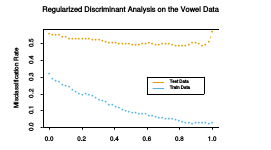

Fig. 7. Test and training errors for the vowel data, using regularized discriminant analysis with a series of values of $α ∈ [0, 1]$. The optimum for the test data occurs around α = 0.9, close to quadratic discriminant analysis.

## Regularized Discriminant Analysis (RDA)

Friedman (1989) proposed a compromise between Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA). This method allows for shrinking the separate covariances of QDA toward a common covariance, similar to LDA. The regularized covariance matrices are given by:

$$
\hat{\Sigma}_k(\alpha) = \alpha \hat{\Sigma}_k + (1 - \alpha) \hat{\Sigma}
$$

where $\hat{\Sigma}$ is the pooled covariance matrix used in LDA, and $\alpha \in [0, 1]$ allows a continuum of models between LDA and QDA. The value of $\alpha$ can be determined based on model performance on validation data or by cross-validation.

**Figure 7.** shows the results of RDA applied to the vowel data. Both training and test errors improve with increasing $\alpha$, although the test error sharply increases after $\alpha = 0.9. The significant discrepancy between training and test errors is partly due to the presence of many repeat measurements on a small number of individuals, differing between the training and test sets.

Similar modifications allow the covariance $\hat{\Sigma}$ itself to be shrunk toward the scalar covariance:

$$
\hat{\Sigma}(\gamma) = \gamma \hat{\Sigma} + (1 - \gamma) \hat{\sigma}^2 I
$$

for $\gamma \in [0, 1]$. Replacing $\hat{\Sigma}$ in the previous equation by $\hat{\Sigma}(\gamma)$ leads to a more general family of covariances $\hat{\Sigma}(\alpha, \gamma)$ indexed by a pair of parameters.

In Chapter 12, we discuss other regularized versions of LDA that are more suitable when the data arises from digitized analog signals and images. In such cases, the features are high-dimensional and correlated, and the LDA coefficients can be regularized to be smooth or sparse in the original signal domain, leading to better generalization and easier interpretation of the coefficients. In Chapter 18, we address very high-dimensional problems, such as gene expression measurements in microarray studies, focusing on the case $\gamma = 0$.

## Computations for LDA

As a lead-in to the next topic, we briefly discuss the computations required for LDA and especially QDA. Their computations are simplified by diagonalizing $\hat{\Sigma}$ or $\hat{\Sigma}_k$. For each $\hat{\Sigma}_k$, we compute the eigen-decomposition:

$$
\hat{\Sigma}_k = U_k D_k U_k^T
$$

where $U_k$ is a $p \times p$ orthonormal matrix and $D_k$ is a diagonal matrix of positive eigenvalues $d_{k\ell}$. The ingredients for the decision rule $\delta_k(x)$ are:

- 
$$
(x - \hat{\mu}_k)^T \hat{\Sigma}_k (x - \hat{\mu}_k) = [U_k^T (x - \hat{\mu}_k)]^T D_k^{-1} [U_k (x - \hat{\mu}_k)]
$$

- 
$$
\log |\hat{\Sigma}_k| = \sum_{\ell} \log d_{k\ell}
$$

In light of these computational steps, the LDA classifier can be implemented by the following pair of steps:

1. **Sphere the data** with respect to the common covariance estimate $\hat{\Sigma}$:

   $$
   X^* \leftarrow D^{-1/2} U^T X
   $$

   where $\hat{\Sigma} = U D U^T$. The common covariance estimate of $X^*$ will now be the identity.

2. **Classify** to the closest class centroid in the transformed space, accounting for the class prior probabilities $\pi_k$.

## Reduced-Rank Linear Discriminant Analysis

So far, we have discussed LDA as a restricted Gaussian classifier. Its popularity is partly due to the additional restriction that allows us to view informative low-dimensional projections of the data. The $K$ centroids in $p$-dimensional input space lie in an affine subspace of dimension at most $K - 1$. If $p$ is much larger than $K$, this results in a significant drop in dimension.

Moreover, when locating the closest centroid, we can ignore distances orthogonal to this subspace since they will contribute equally to each class. Thus, we may project $X^*$ onto this centroid-spanning subspace $H_{K-1}$ and make distance comparisons there. This introduces a fundamental dimension reduction in LDA, indicating that we need only consider the data in a subspace of dimension at most $K - 1$.

## Optimal Subspaces for LDA

If $ K = 3 $, this allows us to view the data in a two-dimensional plot, color-coding the classes. In doing so, we do not lose any information necessary for LDA classification. But what happens if $ K > 3 $? In that case, we might ask for a subspace $ H_L \subseteq H_{K-1} $ that is optimal for LDA in some sense. 

Fisher defined "optimal" to mean that the projected centroids are spread out as much as possible in terms of variance. This involves finding principal component subspaces of the centroids themselves (principal components are briefly described in Section 3.5.1 and in more detail in Section 14.5.1).

 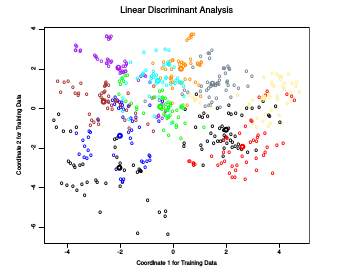
 
Fig. 4. A two-dimensional plot of the vowel training data. There are eleven classes with $X ∈ R^10$ , and this is the best view in terms of a LDA model. The heavy circles are the projected mean vectors for each class. The class overlap is considerable.

**Fig. 4** illustrates such an optimal two-dimensional subspace for the vowel data. In this case, there are eleven classes, each representing a different vowel sound, in a ten-dimensional input space. The centroids require the full space since $ K - 1 = p $, but we can represent an optimal two-dimensional subspace. The dimensions are ordered, allowing us to compute additional dimensions sequentially.


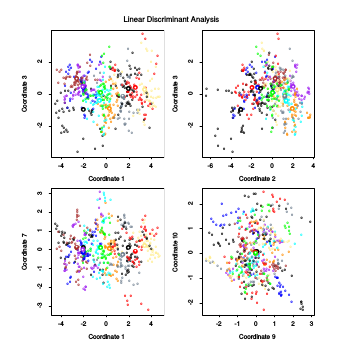
Fig. 5. Four projections onto pairs of canonical variates. Notice that as the rank of the canonical variates increases, the centroids become less spread out. In the lower right panel they appear to be superimposed, and the classes most confused.

**Fig. 5** shows four additional pairs of coordinates, also known as canonical or discriminant variables. 

In summary, finding the sequences of optimal subspaces for LDA involves the following steps:

1. Compute the $ K \times p $ matrix of class centroids $ M $ and the common covariance matrix $ W $ (for within-class covariance).
   
2. Compute 

   $$
   M^* = M W^{-1/2}
   $$

   using the eigen-decomposition of $ W $.

3. Compute $ B^* $, the covariance matrix of $ M^* $ (where $ B $ represents between-class covariance), and perform its eigen-decomposition:

   $$
   B^* = V^* D_B V^{*T}.
   $$

   The columns $ v_\ell^* $ of $ V^* $, ordered from first to last, define the coordinates of the optimal subspaces.

Combining all these operations, the $ \ell $-th discriminant variable is given by:

$$
Z_\ell = v_\ell^T X \quad \text{with} \quad v_\ell = W^{-1/2} v_\ell^*.
$$

Fisher arrived at this decomposition via a different approach, without referencing Gaussian distributions. He posed the problem: find the linear combination 

$$
Z = a^T X 
$$

such that the between-class variance is maximized relative to the within-class variance. The between-class variance is defined as the variance of the class means of \( Z \), while the within-class variance is the pooled variance about the means.

**Figure 4.9** illustrates why this criterion is meaningful. Although the direction joining the centroids separates the means as much as possible (i.e., maximizes the between-class variance), there is significant overlap between the projected classes due to the nature of the covariances. By taking the covariance into account as well, a direction with minimum overlap can be found.

The between-class variance of $ Z $ is given by:

$$
a^T B a,
$$

and the within-class variance is given by:

$$
a^T W a,
$$

where $ W $ is defined earlier, and $ B $ is the covariance matrix of the class centroid matrix $ M $. Note that 

$$
B + W = T,
$$

where $ T $ is the total covariance matrix of $ X $, ignoring class information.

## Optimal Subspaces for LDA

If $ K = 3 $, this allows us to view the data in a two-dimensional plot, color-coding the classes. In doing so, we do not lose any information necessary for LDA classification. But what happens if $ K > 3 $? In that case, we might ask for a subspace $ H_L \subseteq H_{K-1} $ that is optimal for LDA in some sense. 

Fisher defined "optimal" to mean that the projected centroids are spread out as much as possible in terms of variance. This involves finding principal component subspaces of the centroids themselves (principal components are briefly described in later section)

**Figure 4.4** illustrates such an optimal two-dimensional subspace for the vowel data. In this case, there are eleven classes, each representing a different vowel sound, in a ten-dimensional input space. The centroids require the full space since \( K - 1 = p \), but we can represent an optimal two-dimensional subspace. The dimensions are ordered, allowing us to compute additional dimensions sequentially.

**Figure 4.8** shows four additional pairs of coordinates, also known as canonical or discriminant variables. 

In summary, finding the sequences of optimal subspaces for LDA involves the following steps:

1. Compute the \( K \times p \) matrix of class centroids \( M \) and the common covariance matrix \( W \) (for within-class covariance).
   
2. Compute 

   $$
   M^* = M W^{-1/2}
   $$

   using the eigen-decomposition of \( W \).

3. Compute \( B^* \), the covariance matrix of \( M^* \) (where \( B \) represents between-class covariance), and perform its eigen-decomposition:

   $$
   B^* = V^* D_B V^{*T}.
   $$

   The columns \( v_\ell^* \) of \( V^* \), ordered from first to last, define the coordinates of the optimal subspaces.

Combining all these operations, the \( \ell \)-th discriminant variable is given by:

$$
Z_\ell = v_\ell^T X \quad \text{with} \quad v_\ell = W^{-1/2} v_\ell^*.
$$

Fisher arrived at this decomposition via a different approach, without referencing Gaussian distributions. He posed the problem: find the linear combination 

$$
Z = a^T X 
$$

such that the between-class variance is maximized relative to the within-class variance. The between-class variance is defined as the variance of the class means of $ Z $, while the within-class variance is the pooled variance about the means.

**Fi. 9.** illustrates why this criterion is meaningful. Although the direction joining the centroids separates the means as much as possible (i.e., maximizes the between-class variance), there is significant overlap between the projected classes due to the nature of the covariances. By taking the covariance into account as well, a direction with minimum overlap can be found.

The between-class variance of $ Z $ is given by:

$$
a^T B a,
$$

and the within-class variance is given by:

$$
a^T W a,
$$

where $ W $ is defined earlier, and $ B $ is the covariance matrix of the class centroid matrix $ M $. Note that 

$$
B + W = T,
$$

where $ T $ is the total covariance matrix of $ X $, ignoring class information.




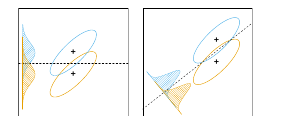
Fig. 9. Although the line joining the centroids deﬁnes the direction of greatest centroid spread, the projected data overlap because of the covariance (left panel). The discriminant direction minimizes this overlap for Gaussian data (right panel).

## Fisher’s Problem and the Rayleigh Quotient

Fisher's problem can be expressed as maximizing the Rayleigh quotient:

$$
\frac{a^T B a}{a^T W a} \quad \text{max} \tag{4.15}
$$

or equivalently,

$$
\text{max} \quad a^T B a \quad \text{subject to} \quad a^T W a = 1. \tag{4.16}
$$

This represents a generalized eigenvalue problem, where $ a $ is determined by the largest eigenvalue of $ W^{-1} B $. It can be shown (Exercise 4.1) that the optimal direction $ a_1 $ is identical to $ v_1 $ defined earlier. Similarly, we can find the next direction $ a_2 $, orthogonal in $ W $ to $ a_1 $, such that 

$$
\frac{a_2^T B a_2}{a_2^T W a_2}
$$ 

is maximized; the solution is $ a_2 = v_2 $, and so on. The vectors $ a_\ell $ are referred to as discriminant coordinates, not to be confused with discriminant functions. They are also known as canonical variates, as an alternative derivation of these results comes from a canonical correlation analysis of the indicator response matrix $ Y $ on the predictor matrix $ X $. This is discussed further in Section 12.5.

## Summary of Developments

To summarize the developments so far:

- Gaussian classification with common covariances leads to linear decision boundaries. Classification can be achieved by sphering the data with respect to $ W $ and classifying to the closest centroid (modulo $ \log \pi_k $) in the sphered space.
  
- Since only the relative distances to the centroids matter, we can confine the data to the subspace spanned by the centroids in the sphered space.

- This subspace can be further decomposed into successively optimal subspaces in terms of centroid separation. This decomposition is identical to Fisher's decomposition.

## LDA and Dimension Reduction on the Vowel Data

**Fig. 10** shows the training and test error rates for the vowel data as a function of the dimension of the discriminant subspace. In this case, the best error rate occurs at dimension 2. **Fig. 11** illustrates the decision boundaries in this space.

The reduced subspaces have been proposed as tools for data reduction (for visualization). Can they also be used for classification, and what is the rationale? Clearly, they can be, as in our original derivation; we simply limit the distance-to-centroid calculations to the chosen subspace. 

It can be shown that this is a Gaussian classification rule with the additional restriction that the centroids of the Gaussians lie in an $ L $-dimensional subspace of $ \mathbb{R}^p $. Fitting such a model using maximum likelihood and constructing posterior probabilities with Bayes’ theorem leads to the classification rule described above. 

Gaussian classification necessitates the $ \log \pi_k $ correction factor in the distance calculation. The rationale for this correction can be observed in **Fig. 9**. The misclassification rate is based on the area of overlap between the two densities. If the $ \pi_k $ values are equal (as implied in that figure), the optimal cut-point lies midway between the projected means. However, if the $ \pi_k $ values are unequal, shifting the cut-point toward the smaller class will improve the error rate. 

As previously mentioned for two classes, one can derive the linear rule using LDA (or any other method) and then select the cut-point to minimize misclassification error over the training data.

## Connection to Reduced-Rank Discriminant Analysis

Returning to the vowel data, with 11 classes and 10 variables, there are 10 possible dimensions for the classifier. We can compute the training and test error in each of these hierarchical subspaces; **Fig. 10** presents the results. **Fig. 11** displays the decision boundaries for the classifier based on the two-dimensional LDA solution.

There is a close relationship between Fisher’s reduced-rank discriminant analysis and regression of an indicator response matrix. It turns out that LDA amounts to regression followed by an eigen-decomposition of $ \hat{Y}^T Y $. In the case of two classes, there exists a single discriminant variable that is identical (up to scalar multiplication) to either of the columns of $ \hat{Y} $. These connections are elaborated in Chapter 12. 

A related fact is that if one transforms the original predictors $ X $ to $ \hat{Y} $, then LDA using $ \hat{Y} $ is identical to LDA in the original space (Exercise 4.3).



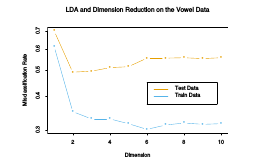

Fig. 10. Training and test error rates for the vowel data, as a function of the dimension of the discriminant subspace. In this case the best error rate is for dimension 2. Fig. 11 shows the decision boundaries in this space.

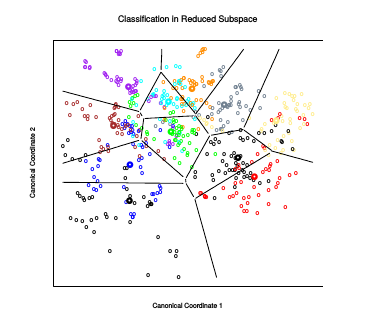

Fig. 11. Decision boundaries for the vowel training data, in the two-di- mensional subspace spanned by the ﬁrst two canonical variates. Note that in any higher-dimensional subspace, the decision boundaries are higher-dimensional aﬃne planes, and could not be represented as lines.


LDA Accuracy: 1.00
QDA Accuracy: 1.00


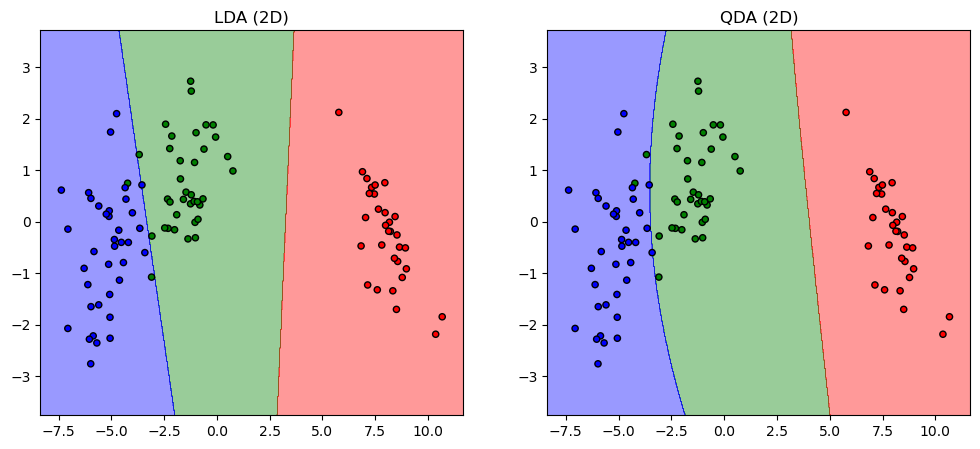

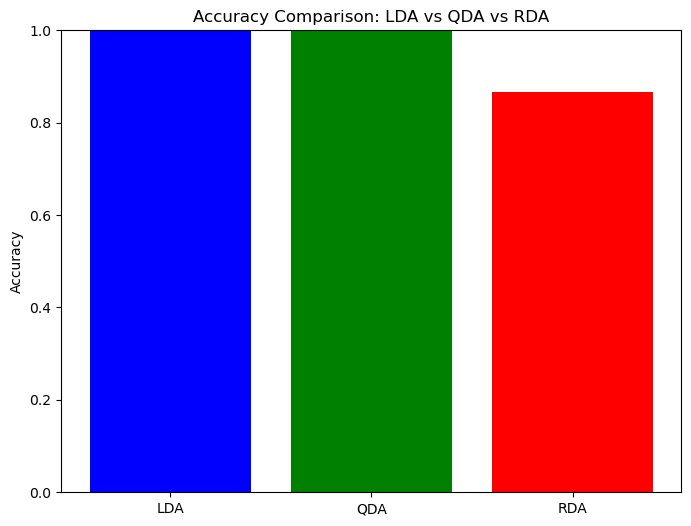

RDA Accuracy: 0.87


In [1]:
# lda_qda_rda_comparison.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Step 1: Load Data
def load_data():
    data = load_iris()
    X = data['data']
    y = data['target']
    return train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Apply LDA and QDA, and calculate accuracy
def apply_lda_qda(X_train, X_test, y_train, y_test):
    lda = LDA()
    qda = QDA()

    lda.fit(X_train, y_train)
    qda.fit(X_train, y_train)

    y_pred_lda = lda.predict(X_test)
    y_pred_qda = qda.predict(X_test)

    acc_lda = accuracy_score(y_test, y_pred_lda)
    acc_qda = accuracy_score(y_test, y_pred_qda)

    return acc_lda, acc_qda, lda, qda

# Step 3: Plot Decision Boundaries
def plot_decision_boundary(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
    ax.set_title(title)

# Step 4: Implement Regularized Discriminant Analysis (RDA)
class RegularizedDiscriminantAnalysis:
    def __init__(self, alpha=0.5):
        self.alpha = alpha
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = {}
        self.covariances_ = {}
        self.pooled_cov_ = np.cov(X.T)
        
        for c in self.classes_:
            X_c = X[y == c]
            self.means_[c] = np.mean(X_c, axis=0)
            self.covariances_[c] = np.cov(X_c.T)
    
    def predict(self, X):
        preds = []
        for x in X:
            class_scores = {}
            for c in self.classes_:
                cov_reg = self.alpha * self.covariances_[c] + (1 - self.alpha) * self.pooled_cov_
                inv_cov = np.linalg.inv(cov_reg)
                mean_diff = x - self.means_[c]
                score = -0.5 * np.dot(np.dot(mean_diff, inv_cov), mean_diff.T)
                class_scores[c] = score
            preds.append(max(class_scores, key=class_scores.get))
        return np.array(preds)

# Step 5: Compare Performance and Plot Accuracy
def compare_performance(X_train, X_test, y_train, y_test, acc_lda, acc_qda):
    rda = RegularizedDiscriminantAnalysis(alpha=0.5)
    rda.fit(X_train, y_train)

    y_pred_rda = rda.predict(X_test)
    acc_rda = accuracy_score(y_test, y_pred_rda)

    # Collect accuracies
    accuracies = [acc_lda, acc_qda, acc_rda]
    methods = ['LDA', 'QDA', 'RDA']

    # Plot accuracy comparison
    plt.figure(figsize=(8, 6))
    plt.bar(methods, accuracies, color=['blue', 'green', 'red'])
    plt.title('Accuracy Comparison: LDA vs QDA vs RDA')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

    return acc_rda

# Step 6: Main Function to run all steps
def main():
    X_train, X_test, y_train, y_test = load_data()

    acc_lda, acc_qda, lda_model, qda_model = apply_lda_qda(X_train, X_test, y_train, y_test)
    print(f"LDA Accuracy: {acc_lda:.2f}")
    print(f"QDA Accuracy: {acc_qda:.2f}")

    # Reduce dimensions for 2D plotting
    lda_2d = LDA(n_components=2)
    X_train_lda = lda_2d.fit_transform(X_train, y_train)

    lda_2d_model = LDA()
    qda_2d_model = QDA()
    lda_2d_model.fit(X_train_lda, y_train)
    qda_2d_model.fit(X_train_lda, y_train)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    plot_decision_boundary(X_train_lda, y_train, lda_2d_model, "LDA (2D)", ax[0])
    plot_decision_boundary(X_train_lda, y_train, qda_2d_model, "QDA (2D)", ax[1])
    plt.show()

    acc_rda = compare_performance(X_train, X_test, y_train, y_test, acc_lda, acc_qda)
    print(f"RDA Accuracy: {acc_rda:.2f}")

if __name__ == "__main__":
    main()
